In [8]:
# Import necessary libraries
from _dirs import *
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import src.test_analyze
import importlib
importlib.reload(src.test_analyze)
from src.test_analyze import *

In [9]:
# GPT 3.5
print("Loading GPT-3.5 results...")
df_gpt35 = pd.read_csv(DIST_DIR + '/mcq-gpt-35-turbo_test.csv')

# Update per position correctness
for pos in range(4):
    df_gpt35[f'pos_{pos}_correctness'] = (df_gpt35[f'pos_{pos}_response_idx'] == pos).astype(int)

print(f"Total number of questions: {len(df_gpt35)}")

# Analyze correctness by position
positions = [0, 1, 2, 3]
overall_correctness_list = []
certain_correctness_list = []
uncertain_correctness_list = []

for pos in positions:
    print("  results position ", pos)
    print("    correctness:")
    overall_corr, certain_corr, uncertain_corr = calculate_correctness(df_gpt35, pos)
    print(f"      overall: {overall_corr:.4f}")
    print(f"      across certain questions: {certain_corr:.4f}")
    print(f"      across uncertain questions: {uncertain_corr:.4f}")
    overall_correctness_list.append(overall_corr)
    certain_correctness_list.append(certain_corr)
    uncertain_correctness_list.append(uncertain_corr)

Loading GPT-3.5 results...
Total number of questions: 250
  results position  0
    correctness:
      overall: 0.7800
      across certain questions: 0.9370
      across uncertain questions: 0.6179
  results position  1
    correctness:
      overall: 0.7440
      across certain questions: 0.9370
      across uncertain questions: 0.5447
  results position  2
    correctness:
      overall: 0.7240
      across certain questions: 0.8976
      across uncertain questions: 0.5447
  results position  3
    correctness:
      overall: 0.6000
      across certain questions: 0.8268
      across uncertain questions: 0.3659


/var/folders/7p/jlgc12dx1_s8p7mrb1bly5z80000gn/T/ipykernel_59283/4215572098.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=positions, y=overall_correctness_list, palette='Blues_d')


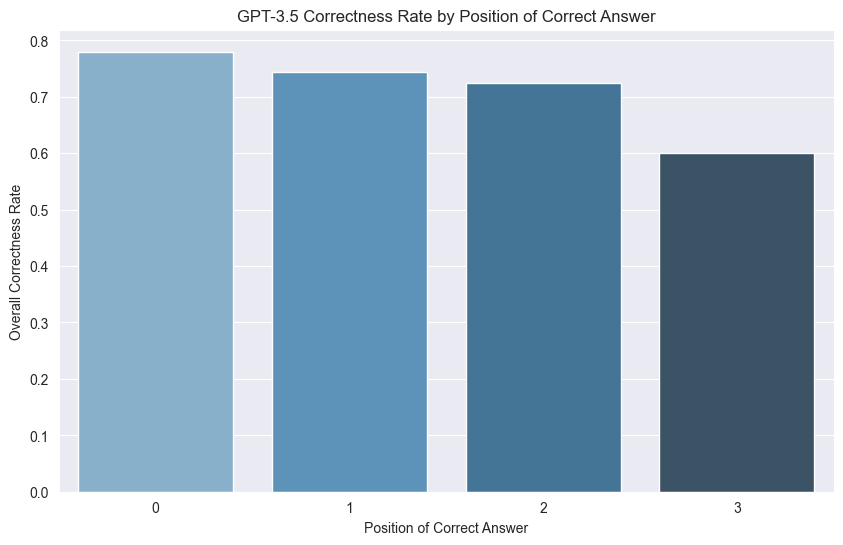

In [10]:
# Visualization: Correctness by Position
plt.figure(figsize=(10, 6))
sns.barplot(x=positions, y=overall_correctness_list, palette='Blues_d')
plt.xlabel('Position of Correct Answer')
plt.ylabel('Overall Correctness Rate')
plt.title('GPT-3.5 Correctness Rate by Position of Correct Answer')
plt.xticks(positions)
plt.show()

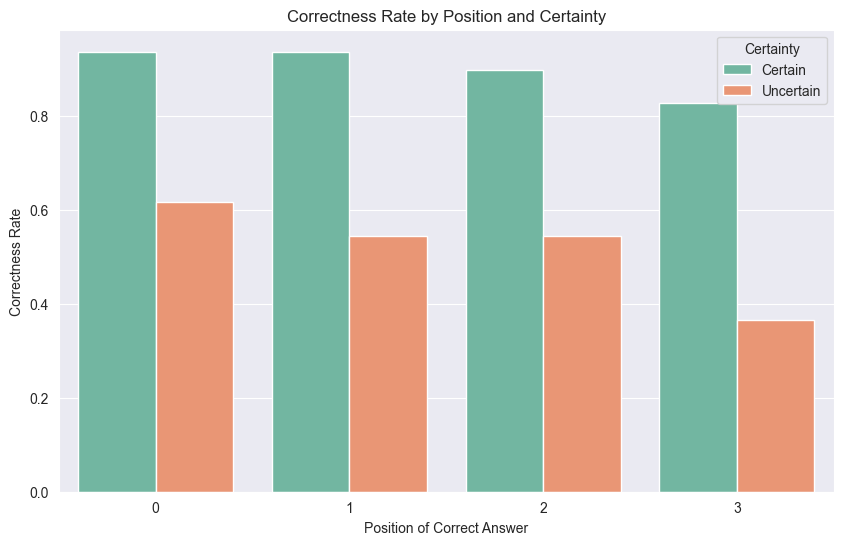

In [13]:
# Visualization: Correctness by Position and Certainty
df_plot = pd.DataFrame({
    'Position': positions * 2,
    'Correctness Rate': certain_correctness_list + uncertain_correctness_list,
    'Certainty': ['Certain'] * 4 + ['Uncertain'] * 4
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Position', y='Correctness Rate', hue='Certainty', data=df_plot, palette='Set2')
plt.xlabel('Position of Correct Answer')
plt.ylabel('Correctness Rate')
plt.title('Correctness Rate by Position and Certainty')
plt.xticks(positions)
plt.legend(title='Certainty')
plt.show()


  confusion matrix for certain questions (counts):
          Predicted 0  Predicted 1  Predicted 2  Predicted 3
Actual 0          119            3            4            1
Actual 1            3          119            3            2
Actual 2            6            6          114            1
Actual 3            7            1           14          105

  normalized confusion matrix for certain questions (percentage):
          Predicted 0  Predicted 1  Predicted 2  Predicted 3
Actual 0         0.94         0.02         0.03         0.01
Actual 1         0.02         0.94         0.02         0.02
Actual 2         0.05         0.05         0.90         0.01
Actual 3         0.06         0.01         0.11         0.83

  confusion matrix for uncertain questions (counts):
          Predicted 0  Predicted 1  Predicted 2  Predicted 3
Actual 0          119            3            4            1
Actual 1            3          119            3            2
Actual 2            6            6

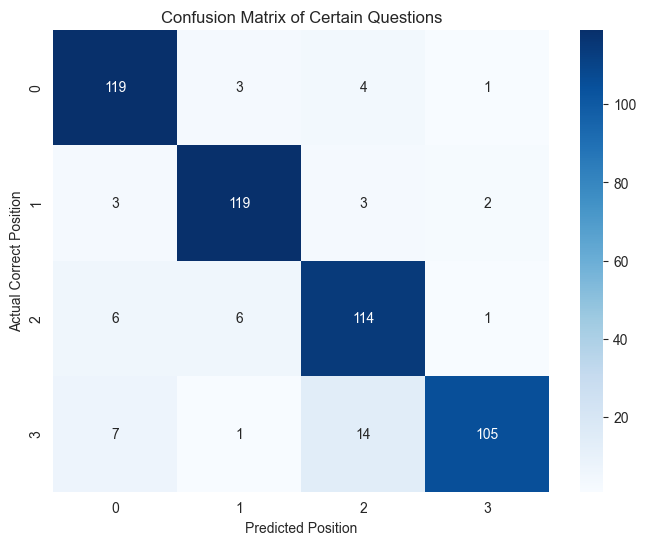

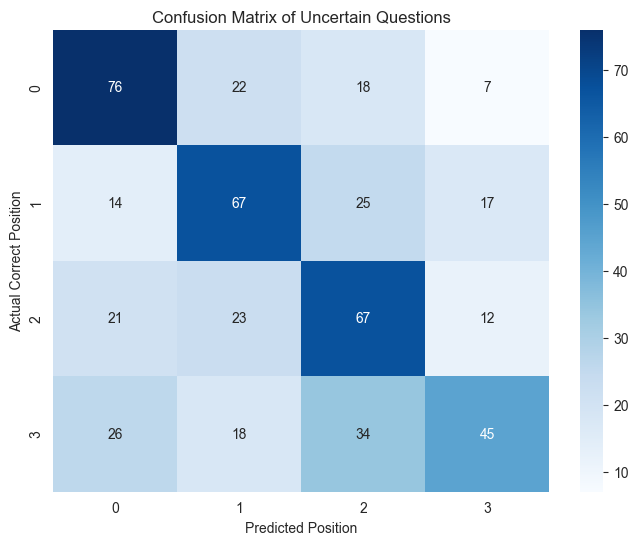

In [12]:
# confusion matrix

# Visualization
def visualize_cf(df_cm, label):
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', xticklabels=positions, yticklabels=positions)
    plt.xlabel('Predicted Position')
    plt.ylabel('Actual Correct Position')
    plt.title(f'Confusion Matrix of {label} Questions')
    plt.show()

# confusion matrix
(df_cm_certain, df_cm_certain_norm) = calculate_confusion_matrix(
    df_gpt35[df_gpt35["is_certain"]], positions)
print("\n  confusion matrix for certain questions (counts):")
print(df_cm_certain)
print("\n  normalized confusion matrix for certain questions (percentage):")
print(df_cm_certain_norm.round(2))
(df_cm_uncertain, df_cm_certain_norm) = calculate_confusion_matrix(
    df_gpt35[~df_gpt35["is_certain"]], positions)
print("\n  confusion matrix for uncertain questions (counts):")
print(df_cm_certain)
print("\n  normalized confusion matrix for uncertain questions (percentage):")
print(df_cm_certain_norm.round(2))

visualize_cf(df_cm_certain, "Certain")
visualize_cf(df_cm_uncertain, "Uncertain")

In [17]:
# GPT 4o mini
print("Loading GPT-4o-mini results...")
df_gpt4om = pd.read_csv(DIST_DIR + '/mcq-gpt-4o-mini_test.csv')

# Update per position correctness
for pos in range(4):
    df_gpt4om[f'pos_{pos}_correctness'] = (df_gpt4om[f'pos_{pos}_response_idx'] == pos).astype(int)

print(f"Total number of questions: {len(df_gpt4om)}")

# Analyze correctness by position
positions = [0, 1, 2, 3]
overall_correctness_list = []
certain_correctness_list = []
uncertain_correctness_list = []

for pos in positions:
    print("  results position ", pos)
    print("    correctness:")
    overall_corr, certain_corr, uncertain_corr = calculate_correctness(df_gpt4om, pos)
    print(f"      overall: {overall_corr:.4f}")
    print(f"      across certain questions: {certain_corr:.4f}")
    print(f"      across uncertain questions: {uncertain_corr:.4f}")
    overall_correctness_list.append(overall_corr)
    certain_correctness_list.append(certain_corr)
    uncertain_correctness_list.append(uncertain_corr)
    

Loading GPT-4o-mini results...
Total number of questions: 250
  results position  0
    correctness:
      overall: 0.8280
      across certain questions: 0.9836
      across uncertain questions: 0.4030
  results position  1
    correctness:
      overall: 0.8680
      across certain questions: 0.9781
      across uncertain questions: 0.5672
  results position  2
    correctness:
      overall: 0.8640
      across certain questions: 0.9727
      across uncertain questions: 0.5672
  results position  3
    correctness:
      overall: 0.7800
      across certain questions: 0.9727
      across uncertain questions: 0.2537


/var/folders/7p/jlgc12dx1_s8p7mrb1bly5z80000gn/T/ipykernel_59283/4213362222.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=positions, y=overall_correctness_list, palette='Blues_d')


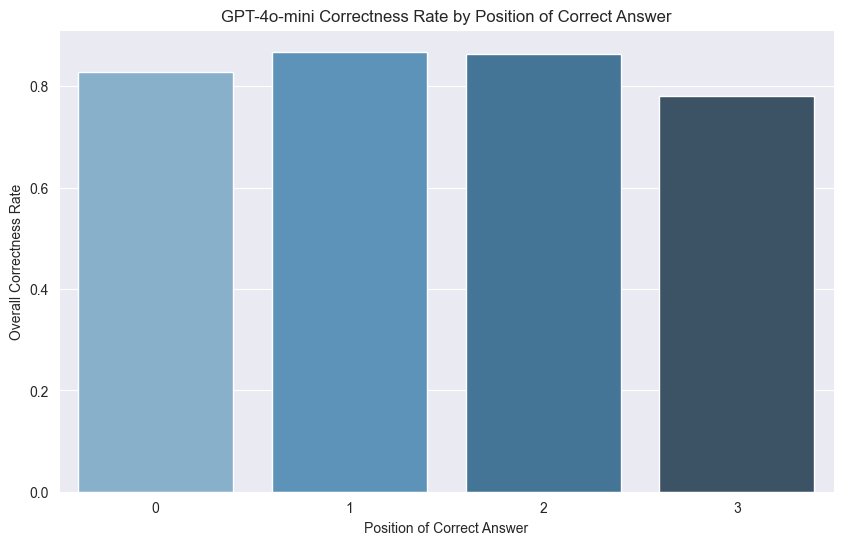

In [20]:
# Visualization: Correctness by Position
plt.figure(figsize=(10, 6))
sns.barplot(x=positions, y=overall_correctness_list, palette='Blues_d')
plt.xlabel('Position of Correct Answer')
plt.ylabel('Overall Correctness Rate')
plt.title('GPT-4o-mini Correctness Rate by Position of Correct Answer')
plt.xticks(positions)
plt.show()

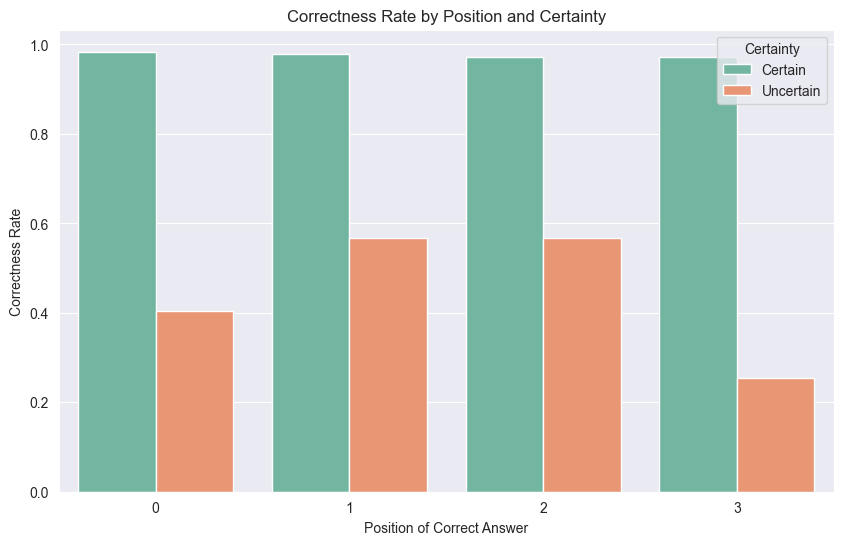

In [19]:
# Visualization: Correctness by Position and Certainty
df_plot = pd.DataFrame({
    'Position': positions * 2,
    'Correctness Rate': certain_correctness_list + uncertain_correctness_list,
    'Certainty': ['Certain'] * 4 + ['Uncertain'] * 4
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Position', y='Correctness Rate', hue='Certainty', data=df_plot, palette='Set2')
plt.xlabel('Position of Correct Answer')
plt.ylabel('Correctness Rate')
plt.title('Correctness Rate by Position and Certainty')
plt.xticks(positions)
plt.legend(title='Certainty')
plt.show()


  confusion matrix for certain questions (counts):
          Predicted 0  Predicted 1  Predicted 2  Predicted 3
Actual 0          180            1            0            2
Actual 1            3          179            0            1
Actual 2            1            4          178            0
Actual 3            3            0            2          178

  normalized confusion matrix for certain questions (percentage):
          Predicted 0  Predicted 1  Predicted 2  Predicted 3
Actual 0         0.98         0.01         0.00         0.01
Actual 1         0.02         0.98         0.00         0.01
Actual 2         0.01         0.02         0.97         0.00
Actual 3         0.02         0.00         0.01         0.97

  confusion matrix for uncertain questions (counts):
          Predicted 0  Predicted 1  Predicted 2  Predicted 3
Actual 0          180            1            0            2
Actual 1            3          179            0            1
Actual 2            1            4

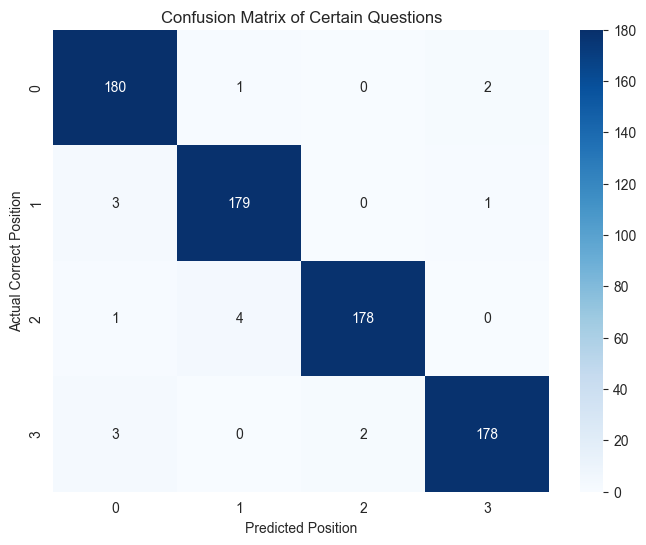

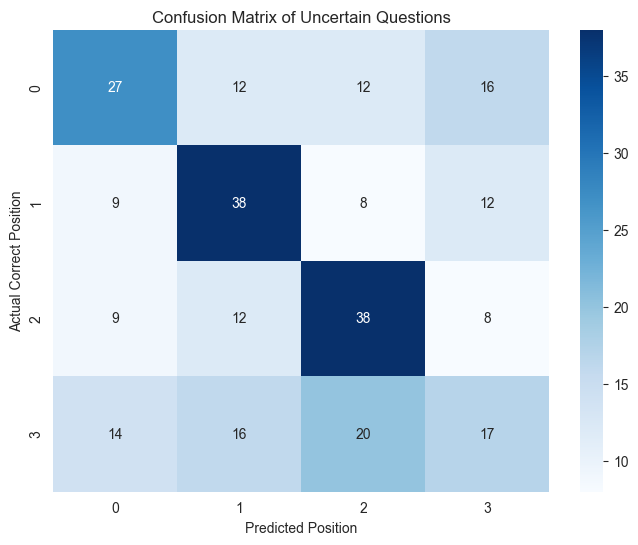

In [21]:
# confusion matrix
(df_cm_certain, df_cm_certain_norm) = calculate_confusion_matrix(
    df_gpt4om[df_gpt4om["is_certain"]], positions)
print("\n  confusion matrix for certain questions (counts):")
print(df_cm_certain)
print("\n  normalized confusion matrix for certain questions (percentage):")
print(df_cm_certain_norm.round(2))
(df_cm_uncertain, df_cm_certain_norm) = calculate_confusion_matrix(
    df_gpt4om[~df_gpt4om["is_certain"]], positions)
print("\n  confusion matrix for uncertain questions (counts):")
print(df_cm_certain)
print("\n  normalized confusion matrix for uncertain questions (percentage):")
print(df_cm_certain_norm.round(2))

visualize_cf(df_cm_certain, "Certain")
visualize_cf(df_cm_uncertain, "Uncertain")